In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#!pip show pillow

In [3]:
#!pip install pillow
#!pip install nvidia-ml-py3

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
import mlcrate as mlc
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
def vgg19_bn_trial(archi):
    print("Trying {}".format(archi))
    data = ImageDataBunch.from_folder("./data_v4/Anime_Recogntn_Images/" , size = 450, valid_pct= 0.15, seed = 42, bs = 16)
    #print(data)
    path = Path('~./Anime_Project/data_v4/Anime_Recogntn_Images')
    
    classes = data.classes
    for c in classes:
        #print(c)
        verify_images(path/c, delete=True, size = 500)
    
    learn = cnn_learner(data, models.vgg19_bn, metrics = error_rate)
    
    learn.fit_one_cycle(8, max_lr=slice(1e-3,1e-2))
    print("Train Cycle 1")
    learn.recorder.plot_losses()

epoch,train_loss,valid_loss,error_rate,time
0,3.177489,2.458001,0.585059,04:49
1,2.839253,2.270976,0.560651,04:50
2,2.485722,1.982654,0.497781,04:44
3,2.226745,1.698306,0.439349,04:53
4,1.778284,1.536837,0.384615,04:44
5,1.442820,1.323277,0.334320,04:19
6,1.052250,1.264547,0.315089,03:47
7,0.902578,1.258978,0.312870,04:06


Train Cycle 1


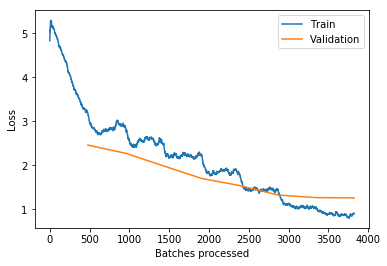

In [6]:
vgg19_bn_trial("VGG19_bn Trial")